<a href="https://colab.research.google.com/github/YonggunJung/Programmers/blob/main/%EA%B2%B9%EC%B9%98%EB%8A%94_%EC%84%A0%EB%B6%84%EC%9D%98_%EA%B8%B8%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.show(close=None, block=None)>

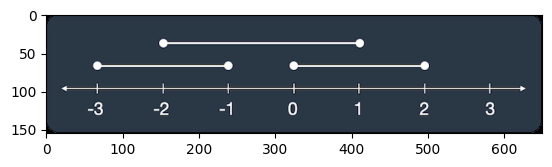

In [6]:
# 문제 설명
# 선분 3개가 평행하게 놓여 있습니다.
# 세 선분의 시작과 끝 좌표가 [[start, end], [start, end], [start, end]]
# 형태로 들어있는 2차원 배열 lines가 매개변수로 주어질 때,
# 두 개 이상의 선분이 겹치는 부분의 길이를 return 하도록 solution 함수를 완성해보세요.

# lines가 [[0, 2], [-3, -1], [-2, 1]]일 때 그림으로 나타내면 다음과 같습니다.
# [그림]
# 선분이 두 개 이상 겹친 곳은 [-2, -1], [0, 1]로 길이 2만큼 겹쳐있습니다.

# 제한사항
# lines의 길이 = 3
# lines의 원소의 길이 = 2
# 모든 선분은 길이가 1 이상입니다.
# lines의 원소는 [a, b] 형태이며, a, b는 각각 선분의 양 끝점 입니다.
# -100 ≤ a < b ≤ 100

# 입출력 예
# lines	                          result
# [[0, 1], [2, 5], [3, 9]]	        2
# [[-1, 1], [1, 3], [3, 9]]	        0
# [[0, 5], [3, 9], [1, 10]]	        8

# 입출력 예 설명
# 입출력 예 #1
# 두 번째, 세 번째 선분 [2, 5], [3, 9]가 [3, 5] 구간에 겹쳐있으므로 2를 return 합니다.

# 입출력 예 #2
# 겹친 선분이 없으므로 0을 return 합니다.

# 입출력 예 #3
# 첫 번째와 두 번째 선분이 [3, 5] 구간에서 겹칩니다.
# 첫 번째와 세 번째 선분 [1, 5] 구간에서 겹칩니다.
# 두 번째와 세 번째 선분 [3, 9] 구간에서 겹칩니다.
# 따라서 [1, 9] 구간에 두 개 이상의 선분이 겹쳐있으므로, 8을 return 합니다.

import matplotlib.pyplot as plt
import cv2

img_bgr = cv2.imread('/content/겹치는 선분의 길이.png')

img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show

In [19]:
# 길이 개념을 못잡아서 실패 ㅠㅠ
def solution(lines):
    answer = set()
    for i, a in enumerate(lines):
        for b in lines[i + 1:]:
                answer |= set(range(a[0], a[1])) & set(range(b[0], b[1]))
    return len(answer)
# 두 개 이상의 선분이 겹치는 부분의 길이 = 두 개 이상의 선분이 겹치는 부분의 시작 점
# 모든 시작 점의 중복은 배제하고 새로운 것은 더하기

In [23]:
lines = [[0, 1], [2, 5], [3, 9]]

solution(lines)

[0, 1]

In [26]:
lines = [[-1, 1], [1, 3], [3, 9]]
solution(lines)

([-1, 0, 1], [1, 2, 3], [3, 4, 5, 6, 7, 8, 9])

In [27]:
lines = [[0, 5], [3, 9], [1, 10]]
a = list(range(lines[0][0], lines[0][1]+1))
b = list(range(lines[1][0], lines[1][1]+1))
c = list(range(lines[2][0], lines[2][1]+1))
a, b, c
# solution(lines)

([0, 1, 2, 3, 4, 5], [3, 4, 5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [28]:
# 이게 제일 간단한 코드 같은데 너무 나열 되어 있음
def solution(lines):
    sets = [set(range(min(l), max(l))) for l in lines]
    return len(sets[0] & sets[1] | sets[0] & sets[2] | sets[1] & sets[2])

In [29]:
# 이게 제일 이해 가 쉬운 코드임
# 세트 활용 지렸음
def solution(lines):
    s1 = set(i for i in range(lines[0][0], lines[0][1]))
    s2 = set(i for i in range(lines[1][0], lines[1][1]))
    s3 = set(i for i in range(lines[2][0], lines[2][1]))
    return len((s1 & s2) | (s2 & s3) | (s1 & s3))

In [30]:
# 이거도 나름 쉽게 되어 있음
def solution(lines):
    starts = [min(a) for a in lines]
    ends = [max(a) for a in lines]
    starts.sort()
    ends.sort()
    answer = 0
    answer += max(0,ends[0] - starts[1])
    answer += max(0, ends[1] - starts[2])
    answer -= max(0, ends[0] - starts[2])
    return answer

In [ ]:
# 이런 한줄 코드도 있지만 쉬워 보이진 않음
def solution(lines):
    import collections
    return sum(1 for k, v in collections.Counter((i, i + 1) for x, y in lines for i in range(min(x, y), max(x, y))).items() if v > 1)
